In [ ]:
import os
import pandas as pd
import matplotlib.pyplot as plt
import numpy as np
import diverse_yeast_tools as dyt

from ete3 import Tree


base_dir = dyt.base_dir



In [9]:
#Load conservation data based on xylose phenotype
cr_by_xylose_phenotype = pd.read_table(base_dir + os.sep + os.path.normpath('examples/xylose/Xylose.tsv'),index_col=0)

#Load xylose pathway members
xylose_genes = pd.read_csv(base_dir + os.sep + os.path.normpath('examples/xylose/xylose_genes.csv'),keep_default_na=False)

#Make dictionaries of genes based on pathways

print('Building <xylose_related_pathway_genes> dictionary of empty lists for each pathway of interest')
xylose_related_pathways_redundant = []

for pathway_list_str in xylose_genes['pathways']:
    pathway_out = dyt.parse_pathway_list(pathway_list_str)
    if not(pathway_out is None):
        xylose_related_pathways_redundant.append(pathway_out)

xylose_related_pathways = list(set(xylose_related_pathways_redundant))

xylose_related_pathway_genes = {pathway : [] for pathway in xylose_related_pathways}

print('\n')


#pathway reassignment:
pathway_reassignments = {'YGR043C': ('NQM1','pentose phosphate pathway (non-oxidative branch)', 'paralog is in the pathway'), 
                         'YLR351C': ('NIT3','xylose metabolism', 'paralog is in the pathway'), 
                         'YJR159W': ('SOR1','xylose metabolism', 'paralog is in the pathway'), 
                         'YDL246C': ('SOR2', 'xylose metabolism', 'paralog is in the pathway')
                         }


print('Populating <xylose_related_pathway_genes> with gene_ids for each pathway')

for ind, row in xylose_genes.iterrows():
    # if row['pathways']=='':
    #      print('no pathway: {}/{}/{}'.format(row['orf'],row['genename'], row['og_ref']))
    if row['orf'] in pathway_reassignments.keys(): 
        print('assigning {}/{} to {} as {}'.format(row['orf'], row['genename'], pathway_reassignments[row['orf']][1], pathway_reassignments[row['orf']][2]))
        xylose_related_pathway_genes[pathway_reassignments[row['orf']][1]].append((row['gene_id'],row['og_ref']))
    else: 
        pathway_list_str = row['pathways']
        pathway_out = dyt.parse_pathway_list(pathway_list_str)
        if pathway_out in xylose_related_pathway_genes.keys(): 
            if row['gene_id']=='':
                print('No gene_id for ' + row['orf'])
            else: 
                xylose_related_pathway_genes[pathway_out].append((row['gene_id'],row['og_ref']))
        else:
            print('No pathway for ' + row['orf'])
        
    

#Look up genes based on gene_id


Building <xylose_related_pathway_genes> dictionary of empty lists for each pathway of interest
No_pathway in pathway_list_str, returning None
No_pathway in pathway_list_str, returning None
No_pathway in pathway_list_str, returning None
pathway_list_str is empty string, returning None


Populating <xylose_related_pathway_genes> with gene_ids for each pathway
No gene_id for 
No gene_id for 
No gene_id for 
No gene_id for YIL053W
No gene_id for YER062C
assigning YLR351C/NIT3 to xylose metabolism as paralog is in the pathway
assigning YJR159W/SOR1 to xylose metabolism as paralog is in the pathway
assigning YDL246C/SOR2 to xylose metabolism as paralog is in the pathway
assigning YGR043C/NQM1 to pentose phosphate pathway (non-oxidative branch) as paralog is in the pathway


In [4]:
xylose_related_pathway_genes

{'pentose phosphate pathway (oxidative branch)': [('REF_Scer_AF-P11412-F1-model_v2',
   'OG1333_REF_Scer_AF-P11412-F1-model_v2'),
  ('REF_Scer_AF-P38858-F1-model_v2', 'OG3991_REF_Scer_AF-P38858-F1-model_v2'),
  ('REF_Scer_AF-P53315-F1-model_v2', 'OG3991_REF_Scer_AF-P38858-F1-model_v2'),
  ('REF_Scer_AF-P38720-F1-model_v2', 'OG1488_REF_Scer_AF-P38720-F1-model_v2'),
  ('REF_Scer_AF-P53319-F1-model_v2', 'OG1488_REF_Scer_AF-P38720-F1-model_v2')],
 'pentose phosphate pathway (non-oxidative branch)': [('REF_Scer_AF-P46969-F1-model_v2',
   'OG2161_REF_Scer_AF-P46969-F1-model_v2'),
  ('REF_Scer_AF-Q12189-F1-model_v2', 'OG1764_REF_Scer_AF-Q12189-F1-model_v2'),
  ('REF_Scer_AF-P23254-F1-model_v2', 'OG1112_REF_Scer_AF-P23254-F1-model_v2'),
  ('REF_Scer_AF-P33315-F1-model_v2', 'OG1112_REF_Scer_AF-P23254-F1-model_v2'),
  ('REF_Scer_AF-P15019-F1-model_v2', 'OG1667_REF_Scer_AF-P15019-F1-model_v2'),
  ('REF_Scer_AF-P53228-F1-model_v2', 'OG1667_REF_Scer_AF-P15019-F1-model_v2')],
 'xylulose degradation'

In [5]:
gois = ['OG2161_REF_Scer_AF-P46969-F1-model_v2', 'OG1764_REF_Scer_AF-Q12189-F1-model_v2', 'OG1112_REF_Scer_AF-P23254-F1-model_v2', 'OG1112_REF_Scer_AF-P33315-F1-model_v2', 'OG1667_REF_Scer_AF-P15019-F1-model_v2']

cr_by_xylose_phenotype.loc[gois,:]

,Mean(CR) 0,Mean(CR) 1,Diff 0-1
Orthogroup,,,
OG2161_REF_Scer_AF-P46969-F1-model_v2,0.760324,0.665056,0.095268
OG1764_REF_Scer_AF-Q12189-F1-model_v2,0.664921,0.627870,0.037050
OG1112_REF_Scer_AF-P23254-F1-model_v2,0.741438,0.593455,0.147984
OG1112_REF_Scer_AF-P33315-F1-model_v2,0.690915,0.565419,0.125495
OG1667_REF_Scer_AF-P15019-F1-model_v2,0.735163,0.717855,0.017308


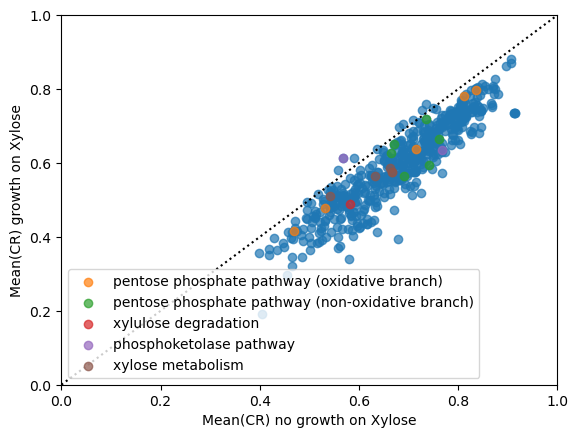

In [6]:
#Plot scatterplot of difference for OGs involved in xylose utilization
fig, ax = plt.subplots(1,1)

ax.scatter(cr_by_xylose_phenotype['Mean(CR) 0'], cr_by_xylose_phenotype['Mean(CR) 1'], alpha = 0.7)

for pathway, gene_list in xylose_related_pathway_genes.items():
    og_gene_ids = []
    for gene in gene_list:
        #gene = xylose_related_pathway_genes['xylulose degradation'][0]
        og = gene[1].split('_REF_')[0]
        og_gene_id = og + '_' + gene[0]
        og_gene_ids.append(og_gene_id)

    

    data_subset = cr_by_xylose_phenotype.loc[og_gene_ids,:]

    ax.scatter(data_subset['Mean(CR) 0'], data_subset['Mean(CR) 1'], alpha = 0.7, label=pathway)

ax.legend()

xmin = 0
xmax = 1

ax.set_xlim([xmin, xmax])
ax.set_ylim([xmin, xmax])
ax.set_xlabel('Mean(CR) no growth on Xylose')
ax.set_ylabel('Mean(CR) growth on Xylose')

ax.plot([0,1], [0,1], color = 'k', linestyle = ':')

In [10]:
cr_by_xylose_phenotype

SC_orfs_lookup, SC_genename_lookup, SC_features_lookup = dyt.read_SGD_features()
protein_ids = pd.read_csv(base_dir+os.sep + os.path.normpath('selected_proteins/selected_protein_ids.csv'), index_col=0)

gene_ids = []
for og_gene_id in list(cr_by_xylose_phenotype.index):
    gene_ids.append('_'.join(og_gene_id.split('_')[1:]))

orf_list = list(protein_ids.loc[gene_ids,:]['gene_id_model_org'])

genename_list = [SC_genename_lookup[orf] for orf in orf_list]

cr_by_xylose_phenotype['orf'] = orf_list
cr_by_xylose_phenotype['genename'] = genename_list

cr_by_xylose_phenotype.to_csv(base_dir + os.sep + 'examples/xylose/Xylose_orf_genename.csv')


In [11]:
#Show top 10% (by numbrer of reference structures)

pct_thresh = 0.1
index_cutoff = int(np.floor(len(cr_by_xylose_phenotype)*pct_thresh))

cr_by_xylose_phenotype.sort_values('Diff 0-1', ascending=False).iloc[0:index_cutoff,:]

,Mean(CR) 0,Mean(CR) 1,Diff 0-1,orf,genename
Orthogroup,,,,,
OG3630_REF_Scer_AF-P40582-F1-model_v2,0.678922,0.393803,0.285119,YIR038C,GTT1
OG2147_REF_Scer_AF-P39692-F1-model_v2,0.578948,0.340903,0.238045,YFR030W,MET10
OG4391_REF_Scer_AF-P40017-F1-model_v2,0.635748,0.412424,0.223324,YER024W,YAT2
OG1254_REF_Scer_AF-P40395-F1-model_v2,0.404629,0.190000,0.214629,YLR039C,RIC1
OG3902_REF_Scer_AF-P14020-F1-model_v2,0.725874,0.518923,0.206951,YPR183W,DPM1
OG4346_REF_Scer_AF-P10174-F1-model_v2,0.671506,0.472810,0.198696,YMR256C,COX7
OG2113_REF_Scer_AF-P00815-F1-model_v2,0.766786,0.573655,0.193130,YCL030C,HIS4
OG4061_REF_Scer_AF-P32476-F1-model_v2,0.706076,0.513429,0.192647,YGR175C,ERG1
OG3074_REF_Scer_AF-P38913-F1-model_v2,0.558299,0.368914,0.189385,YDL045C,FAD1


In [10]:
print("Mean diff: {}, Std Deviation of Diff: {}".format(np.mean(cr_by_xylose_phenotype['Diff 0-1']), np.std(cr_by_xylose_phenotype['Diff 0-1'])))

Mean diff: 0.08484794662311583, Std Deviation of Diff: 0.04461239613347022


In [16]:
cr_by_xylose_phenotype[cr_by_xylose_phenotype['genename']=='TKL2']

,Mean(CR) 0,Mean(CR) 1,Diff 0-1,orf,genename
Orthogroup,,,,,
OG1112_REF_Scer_AF-P33315-F1-model_v2,0.690915,0.565419,0.125495,YBR117C,TKL2


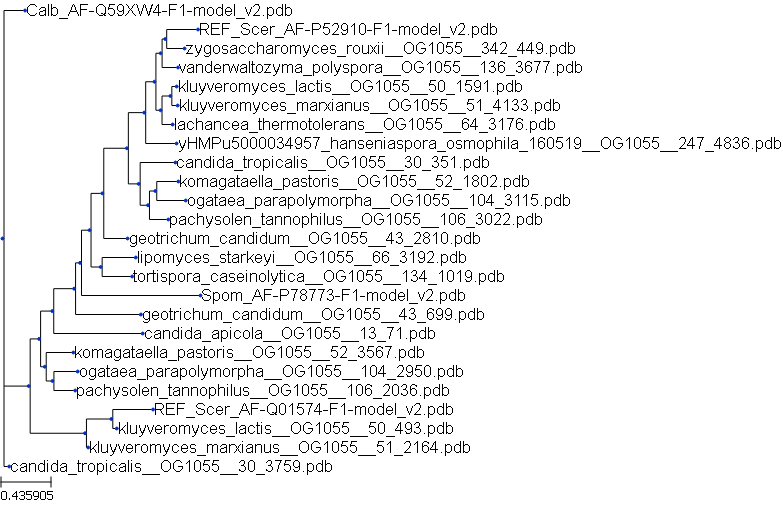

In [13]:
#Analysis of ACS1_ACS2 orthogroup
#Get species ordered by tree 

og_refs = {'GRE3': 'OG1022_REF_Scer_AF-P38715-F1-model_v2', 
           'ACS1_ACS2': 'OG1055_REF_Scer_AF-P52910-F1-model_v2'
            }

goi = 'ACS1_ACS2'

og_ref = og_refs[goi]

tree_fname = base_dir + os.sep + os.path.normpath('msas/structural/tm_align/trees/' + og_ref + '.tm.fasta.clipkit.treefile')
t = Tree(tree_fname, format=1)

t.ladderize

fname_out = base_dir + os.sep + os.path.normpath('examples/' + goi + '_tree_list.txt')

with open(fname_out,'w') as f_out:
    for leaf in t.iter_leaf_names():
        f_out.write(leaf + '\n')


t.render('%%inline')

In [15]:
#ACS1/2 all by all cluster results: 

#First made file with just OG1055 from 
#G:\My Drive\Crick_LMS\projects\diverse_yeasts\alphafold\msas\structural\tm_align\clustering\all.xlsx
#Get species ordered by tree 

og_refs = {'GRE3': 'OG1022_REF_Scer_AF-P38715-F1-model_v2', 
           'ACS1_ACS2': 'OG1055_REF_Scer_AF-P52910-F1-model_v2'
            }

goi = 'ACS1_ACS2'

og_ref = og_refs[goi]

tree_fname = base_dir + os.sep + os.path.normpath('msas/structural/tm_align/trees/' + og_ref + '.tm.fasta.clipkit.treefile')
t = Tree(tree_fname, format=1)

structure_order = t.get_leaf_names()

#
tm_scores = pd.read_csv(base_dir + os.sep + 'examples/xylose/acs1_acs2.csv')


tm_matrix = []

for struct1 in structure_order: 
    tm_scores_subset = tm_scores.loc[tm_scores['PDB1']==struct1, :]
    tm_scores_subset.set_index('PDB2', inplace=True)
    tm_row = []
    for struct2 in structure_order: 
        if struct1==struct2: 
            tm_row.append(1)
        else: 
            tm_val = tm_scores_subset.loc[struct2,'TM_score']
            tm_row.append(tm_val)
    tm_matrix.append(tm_row)




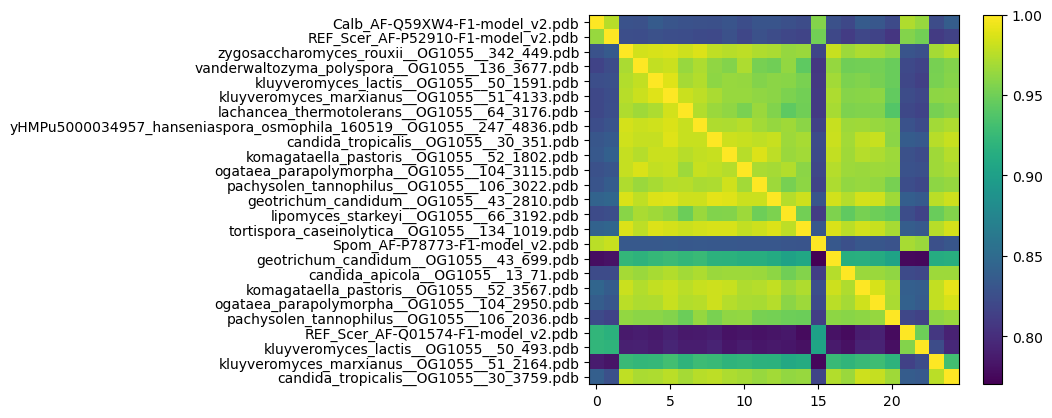

In [20]:
fig, ax = plt.subplots()

tm_all_by_all = ax.imshow(tm_matrix)
ax.set_yticks(range(len(structure_order)),labels=structure_order)
fig.colorbar(tm_all_by_all, ax=ax)

In [ ]:
#The ETC proteins were also enriched in the genes with high differences in the Xylose pathway

etc_table = pd.read_csv(base_dir + os.sep + 'examples/etc/etc_table_annotated.csv')

etc_table_subset = etc_table[ (etc_table['og_retained']) & (~etc_table['mitochondrial'])]
print('Number of orthogroups of nuclear encoded ETC proteins included in our pathway analysis: {}'.format(len(set(etc_table_subset['primary_id']))))


Number of orthogroups of nuclear encoded ETC proteins included in our pathway analysis: 22
